# Univariate Linear Regression

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

1) Erstellen Sie zuerst zum Testen Ihrer Lösung automatische Daten,
d.h. Punkte die auf einer Geraden liegen und deren y-Werte mittels eines gaussverteilten "Rauschen" von idealen Werten abweichen. x und y sollen dabei zwei gleichlange numpy-Arrays sein.

In [211]:
def linear_gaussian_dataset(x, y, multiplier = 1.0):
    noise = np.random.normal(0, 1, len(x))
    return y + multiplier * noise

In [212]:
X = np.linspace(0, 10, 100)
Y = 2.5 * X + 1

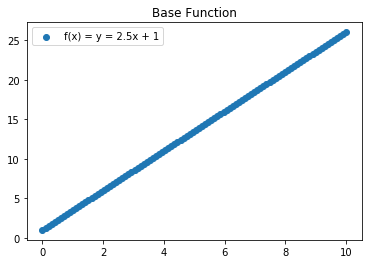

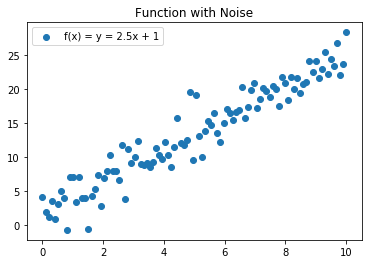

In [213]:
def fast_plot(x, y, titel, description):
    plt.scatter(x,y,label=description)
    plt.title(titel) 
    plt.legend()
    plt.show()

fast_plot(X, Y, 'Base Function', 'f(x) = y = 2.5x + 1')
Y = linear_gaussian_dataset(X, Y, multiplier = 2.0)
fast_plot(X, Y, 'Function with Noise', 'f(x) = y = 2.5x + 1')

2) Implementieren Sie die Hypothese (lineares Modell) als Python Funktion: 
```python
linear_hypothesis(theta_0, theta_1)
```
Die Pythonfunktion soll dabei eine Funktion zurückgeben:
```python
hypothesis = linear_hypothesis(2., 3.)
print hypothesis(np.array([1., 2.]))
[ 5.  8.]
```

In [214]:
def linear_hypothesis(theta_0, theta_1):
    return lambda values: [theta_0 + theta_1 * x for x in values]

hypothesis = linear_hypothesis(2., 3.)
print(hypothesis(np.array([1., 2.])))

[5.0, 8.0]


3) Implementieren Sie die Kostenfunktion J als Python Funktion:
```python
def cost_function(hypothesis, x, y):
```
Die Pythonfunktion soll dabei eine Funktion zurückgeben, die
die beiden Parameter theta_0 und theta_1 aufnimmt.
```python
j = cost_function(linear_hypothesis, x, y)
print j(2.1, 2.9)
41.20  # Wert abhaengig von x und y
```

In [215]:
def cost_function(hypothesis, x, y):
    return lambda theta_0, theta_1: 1 / (2 * float(len(x))) * np.sum(np.square(hypothesis(theta_0, theta_1)(x) - y))

j = cost_function(linear_hypothesis, x, y)
print(j(2.1, 2.9))

7.66688047033


 4) Plotten Sie die Kostenfunktion in der Umgebung des Minimums als Contourplot. Verwenden Sie hierzu plt.contour(X,Y,Z) und zum Erzeugen des X-Y-Oberflaechengitters meshgrid(..)